#Loading Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.utils import to_categorical,plot_model
import warnings
warnings.filterwarnings(action = "ignore")

# Task A

### 1. Load the hearts dataset

In [ ]:
hp_df = pd.read_csv("A03_train.csv")

In [ ]:
print('Shape of house price prediction dataset : ', hp_df.shape)

Shape of house price prediction dataset :  (1460, 81)


In [ ]:
print('Columns of house price prediction dataset :', hp_df.columns)

Columns of house price prediction dataset : Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'G

In [ ]:
# Basic information of data
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Preview of data
hp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
hp_df.isna().sum().sum()

0

In [ ]:
hp_df.columns[hp_df.isnull().any()]

Index([], dtype='object')

### 2. Select 4 important features

In [ ]:
target = 'SalePrice'
numerical_features = hp_df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
hp_df[numerical_features] = imputer.fit_transform(hp_df[numerical_features])
anova_scores = {}
for num_feature in numerical_features:
    f_statistic, p_value = f_classif(hp_df[[num_feature]], hp_df[target])
    anova_scores[num_feature] = p_value
selected_features = sorted(anova_scores.keys(), key=lambda x: anova_scores[x])[:5]
print("Selected Features:", selected_features)

Selected Features: ['SalePrice', 'OverallQual', 'ExterQual', 'MiscVal', 'GrLivArea']


In [ ]:
hp_df2 = hp_df[['SalePrice', 'OverallQual', 'ExterQual', 'MiscVal', 'GrLivArea']]

In [ ]:
hp_df2.head()

,SalePrice,OverallQual,ExterQual,MiscVal,GrLivArea
0,208500.0,7.0,2.0,0.0,1710.0
1,181500.0,6.0,3.0,0.0,1262.0
2,223500.0,7.0,2.0,0.0,1786.0
3,140000.0,7.0,3.0,0.0,1717.0
4,250000.0,8.0,2.0,0.0,2198.0


### 3. Apply Linear Regression (sklearn) to it

In [ ]:
def evaluate_regression_model(model,model_name,x_train,y_train,x_test,y_test,x_valid,y_valid):

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_val_pred = model.predict(x_valid)

    Training_Score = np.round(model.score(x_train,y_train),2)
    Testing_Score = np.round(model.score(x_test,y_test),2)
    Validation_score = np.round(model.score(x_valid,y_valid),2)

    mse_training = np.round(mean_squared_error(y_train,y_train_pred),2)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),2)
    mse_validation = np.round(mean_squared_error(y_valid,y_val_pred),2)

    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),2)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),2)
    mae_valid = np.round(mean_absolute_error(y_valid,y_val_pred),2)

    r2_training = np.round(r2_score(y_train,y_train_pred),2)
    r2_testing = np.round(r2_score(y_test,y_test_pred),2)
    r2_valid = np.round(r2_score(y_valid,y_val_pred),2)


    print("Model Performance for:",model_name)
    print("")

    print("Training Score:",Training_Score)
    print("Testing Score:",Testing_Score)
    print("Validation Score",Validation_score)
    print("")

    print("Training Data Mean Squared Error:",mse_training)
    print("Testing Data Mean Squared Error:",mse_testing)
    print("Validation Data Mean Squared Error:",mse_validation)

    print("")

    print("Training Data Mean Absolute Error:",mae_training)
    print("Testing Data Mean Absolute Error:",mae_testing)
    print("Validation Data Mean Absolute Error:",mae_valid)
    print("")

    print("Training Data r2_score:",r2_training)
    print("Testing Data r2_score:",r2_testing)
    print("Validation Data r2_score:",r2_valid)

    return Training_Score,Testing_Score,Validation_score,mse_training,mse_testing,mse_validation,mae_training,mae_testing,mae_valid,r2_training,r2_testing,r2_valid

In [ ]:
X = hp_df2.iloc[:,1:]
y = hp_df2['SalePrice']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr = evaluate_regression_model(model1, 'Linear Regression', X_train, y_train, X_test, y_test, X_val, y_val)

Model Performance for: Linear Regression

Training Score: 0.73
Testing Score: 0.74
Validation Score 0.83

Training Data Mean Squared Error: 1667916380.54
Testing Data Mean Squared Error: 1904668107.51
Validation Data Mean Squared Error: 1087584285.31

Training Data Mean Absolute Error: 27621.49
Testing Data Mean Absolute Error: 28252.11
Validation Data Mean Absolute Error: 24134.17

Training Data r2_score: 0.73
Testing Data r2_score: 0.74
Validation Data r2_score: 0.83


### 4. Apply Polynomial Regression (sklearn) to it

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_val_poly = poly.fit_transform(X_val)

In [ ]:
model2 = LinearRegression()
model2.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
pr = evaluate_regression_model(model2, "Polynomial Regression", X_train_poly, y_train, X_test_poly, y_test, X_val_poly, y_val)

Model Performance for: Polynomial Regression

Training Score: 0.78
Testing Score: 0.77
Validation Score 0.72

Training Data Mean Squared Error: 1351317848.09
Testing Data Mean Squared Error: 1692842516.29
Validation Data Mean Squared Error: 1761084782.32

Training Data Mean Absolute Error: 26190.29
Testing Data Mean Absolute Error: 26474.4
Validation Data Mean Absolute Error: 25596.27

Training Data r2_score: 0.78
Testing Data r2_score: 0.77
Validation Data r2_score: 0.72


In [ ]:
models_performance = [["Linear Regression",lr[0],lr[1],lr[2],lr[3],lr[4],lr[5],lr[6],lr[7],lr[8],lr[9],lr[10],lr[11]],
                     ["Polynomial Regression",pr[0],pr[1],pr[2],pr[3],pr[4],pr[5],pr[6],pr[7],pr[8],pr[9],pr[10],pr[11]]]

In [ ]:
models_performance = pd.DataFrame(models_performance,columns = ["Model Name","Training Score","Testing Score","Validation score","mse training","mse testing","mse validation","mae training","mae testing","mae valid","r2 training","r2 testing","r2 valid"])

In [ ]:
models_performance


,Model Name,Training Score,Testing Score,Validation score,mse training,mse testing,mse validation,mae training,mae testing,mae valid,r2 training,r2 testing,r2 valid
0,Linear Regression,0.73,0.74,0.83,1.667916e+09,1.904668e+09,1.087584e+09,27621.49,28252.11,24134.17,0.73,0.74,0.83
1,Polynomial Regression,0.78,0.77,0.72,1.351318e+09,1.692843e+09,1.761085e+09,26190.29,26474.40,25596.27,0.78,0.77,0.72


# Task B

## 1. Hearts dataset

### 1. Load Data

In [ ]:
heart_df = pd.read_csv('A03_heart.csv')

In [ ]:
print('Shape of heart dataset : ', heart_df.shape)

Shape of heart dataset :  (303, 14)


In [ ]:
print('Columns of heart dataset :', heart_df.columns)

Columns of heart dataset : Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
# Basic information of data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Preview of data
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_df.isna().sum().sum()

0

In [ ]:
heart_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Here we can see that sex,cp,fbs,restecg,exang,slope,ca and thal are categorical variables and remaining are numerical variables.

In [ ]:
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 2. Preprocess Data

In [ ]:
heart_df2 = heart_df.copy()

Apply StandardScaler to all numerical variables. But no need to aaply any transformer to categorical variable because of they are already in label formate.

In [ ]:
sc = StandardScaler()
heart_df2["age"] = sc.fit_transform(heart_df2["age"].values.reshape(-1,1))
heart_df2["trestbps"] = sc.fit_transform(heart_df2["trestbps"].values.reshape(-1,1))
heart_df2["chol"] = sc.fit_transform(heart_df2["chol"].values.reshape(-1,1))
heart_df2["thalach"] = sc.fit_transform(heart_df2["thalach"].values.reshape(-1,1))
heart_df2["oldpeak"] = sc.fit_transform(heart_df2["oldpeak"].values.reshape(-1,1))

### 3. Split Data

In [ ]:
heart_df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [ ]:
x = heart_df2.iloc[:,:-1]
y = heart_df2.iloc[:,-1]

In [ ]:
x_train,x_part,y_train,y_part = train_test_split(x,y,test_size = .2,random_state = 42)
x_test,x_valid,y_test,y_valid = train_test_split(x_part,y_part,test_size = 0.1,random_state = 42)

In [ ]:
x_train.shape

(242, 13)

### 4. Create ANN models.

In [ ]:
model01 = Sequential()
model01.add(Dense(32, input_shape=(13,), activation='tanh'))
model01.add(Dense(64, activation='tanh'))
model01.add(Dense(128, activation='tanh'))
model01.add(Dense(64, activation='tanh'))
model01.add(Dense(32, activation='tanh'))
model01.add(Dense(1, activation='sigmoid'))

In [ ]:
model01.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 32)                448       
                                                                 
 dense_86 (Dense)            (None, 64)                2112      
                                                                 
 dense_87 (Dense)            (None, 128)               8320      
                                                                 
 dense_88 (Dense)            (None, 64)                8256      
                                                                 
 dense_89 (Dense)            (None, 32)                2080      
                                                                 
 dense_90 (Dense)            (None, 1)                 33        
                                                                 
Total params: 21,249
Trainable params: 21,249
Non-tra

In [ ]:
# compiling model
model01.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
# fitting data into our model
history01 = model01.fit(x_train,y_train,epochs = 100,batch_size = 32,validation_data = (x_valid,y_valid))

Epoch 1/100
8/8 [==============================] - 2s 37ms/step - loss: 0.5925 - accuracy: 0.6983 - val_loss: 0.2924 - val_accuracy: 1.0000
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4690 - accuracy: 0.7934 - val_loss: 0.1711 - val_accuracy: 1.0000
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4266 - accuracy: 0.8182 - val_loss: 0.1781 - val_accuracy: 1.0000
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.3979 - accuracy: 0.8306 - val_loss: 0.1365 - val_accuracy: 1.0000
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3890 - accuracy: 0.8512 - val_loss: 0.1435 - val_accuracy: 1.0000
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3597 - accuracy: 0.8388 - val_loss: 0.1402 - val_accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3702 - accuracy: 0.8388 - val_loss: 0.1520 - val_accuracy: 1.0000
Epoch 8/100
8/8 [========

In [ ]:
def plot_function_classification(history):
    fig,ax = plt.subplots(1,2,figsize = (25,5))
    ax[0].plot(history.history['loss'],color = 'red',label = 'train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'],color = 'green',label = 'val_loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'],color = 'orange',label = 'train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_accuracy'],color = 'black',label = 'val_accuarcy')
    ax[1].legend()

In [ ]:
model02 = Sequential()
model02.add(Dense(32, input_shape=(13,), activation='tanh'))
model02.add(Dense(64, activation='tanh'))
model02.add(Dense(100, activation='tanh'))
model02.add(Dense(64, activation='tanh'))
model02.add(Dense(32, activation='tanh'))
model02.add(Dense(1, activation='sigmoid'))

In [ ]:
model02.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 32)                448       
                                                                 
 dense_92 (Dense)            (None, 64)                2112      
                                                                 
 dense_93 (Dense)            (None, 100)               6500      
                                                                 
 dense_94 (Dense)            (None, 64)                6464      
                                                                 
 dense_95 (Dense)            (None, 32)                2080      
                                                                 
 dense_96 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,637
Trainable params: 17,637
Non-tra

In [ ]:
model02.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
history02 = model02.fit(x_train,y_train,epochs = 100,batch_size = 32,validation_data = (x_valid,y_valid))

Epoch 1/100
8/8 [==============================] - 2s 33ms/step - loss: 0.6459 - accuracy: 0.5992 - val_loss: 0.4941 - val_accuracy: 0.7143
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4719 - accuracy: 0.7893 - val_loss: 0.4613 - val_accuracy: 0.7143
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4206 - accuracy: 0.8140 - val_loss: 0.5123 - val_accuracy: 0.7143
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.3996 - accuracy: 0.8099 - val_loss: 0.5124 - val_accuracy: 0.7143
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3774 - accuracy: 0.8223 - val_loss: 0.4646 - val_accuracy: 0.7143
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3725 - accuracy: 0.8264 - val_loss: 0.4240 - val_accuracy: 0.7143
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3521 - accuracy: 0.8512 - val_loss: 0.3998 - val_accuracy: 0.7143
Epoch 8/100
8/8 [========

In [ ]:
model03 = Sequential()
model03.add(Dense(32, input_shape=(13,), activation='tanh'))
model03.add(Dense(64, activation='tanh'))
model03.add(Dense(100, activation='tanh'))
model03.add(Dense(64, activation='tanh'))
model03.add(Dense(32, activation='tanh'))
model03.add(Dense(1, activation='sigmoid'))

In [ ]:
model03.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 32)                448       
                                                                 
 dense_98 (Dense)            (None, 64)                2112      
                                                                 
 dense_99 (Dense)            (None, 100)               6500      
                                                                 
 dense_100 (Dense)           (None, 64)                6464      
                                                                 
 dense_101 (Dense)           (None, 32)                2080      
                                                                 
 dense_102 (Dense)           (None, 1)                 33        
                                                                 
Total params: 17,637
Trainable params: 17,637
Non-tra

In [ ]:
model03.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
history03 = model03.fit(x_train,y_train,epochs = 40,batch_size = 32,validation_data = (x_valid,y_valid))

Epoch 1/40
8/8 [==============================] - 2s 32ms/step - loss: 0.5792 - accuracy: 0.6860 - val_loss: 0.3070 - val_accuracy: 0.8571
Epoch 2/40
8/8 [==============================] - 0s 8ms/step - loss: 0.4643 - accuracy: 0.8017 - val_loss: 0.2374 - val_accuracy: 0.8571
Epoch 3/40
8/8 [==============================] - 0s 10ms/step - loss: 0.4183 - accuracy: 0.8140 - val_loss: 0.2184 - val_accuracy: 0.8571
Epoch 4/40
8/8 [==============================] - 0s 7ms/step - loss: 0.3834 - accuracy: 0.8182 - val_loss: 0.2459 - val_accuracy: 0.8571
Epoch 5/40
8/8 [==============================] - 0s 7ms/step - loss: 0.3731 - accuracy: 0.8430 - val_loss: 0.2542 - val_accuracy: 0.8571
Epoch 6/40
8/8 [==============================] - 0s 7ms/step - loss: 0.3694 - accuracy: 0.8306 - val_loss: 0.2135 - val_accuracy: 0.8571
Epoch 7/40
8/8 [==============================] - 0s 7ms/step - loss: 0.3517 - accuracy: 0.8512 - val_loss: 0.2375 - val_accuracy: 0.8571
Epoch 8/40
8/8 [================

In [ ]:
model04 = Sequential()
model04.add(Dense(32, input_shape=(13,), activation='tanh'))
model04.add(Dense(64, activation='tanh'))
model04.add(Dense(100, activation='tanh'))
model04.add(Dense(64, activation='tanh'))
model04.add(Dense(32, activation='tanh'))
model04.add(Dense(1, activation='sigmoid'))

In [ ]:
model04.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 32)                448       
                                                                 
 dense_104 (Dense)           (None, 64)                2112      
                                                                 
 dense_105 (Dense)           (None, 100)               6500      
                                                                 
 dense_106 (Dense)           (None, 64)                6464      
                                                                 
 dense_107 (Dense)           (None, 32)                2080      
                                                                 
 dense_108 (Dense)           (None, 1)                 33        
                                                                 
Total params: 17,637
Trainable params: 17,637
Non-tra

In [ ]:
model04.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
history04 = model04.fit(x_train,y_train,epochs = 40,batch_size = 80,validation_data = (x_valid,y_valid))

Epoch 1/40
4/4 [==============================] - 2s 83ms/step - loss: 0.6961 - accuracy: 0.5000 - val_loss: 0.6740 - val_accuracy: 0.7143
Epoch 2/40
4/4 [==============================] - 0s 20ms/step - loss: 0.5438 - accuracy: 0.7355 - val_loss: 0.6206 - val_accuracy: 0.7143
Epoch 3/40
4/4 [==============================] - 0s 15ms/step - loss: 0.4892 - accuracy: 0.7521 - val_loss: 0.6290 - val_accuracy: 0.7143
Epoch 4/40
4/4 [==============================] - 0s 20ms/step - loss: 0.4817 - accuracy: 0.7521 - val_loss: 0.6201 - val_accuracy: 0.7143
Epoch 5/40
4/4 [==============================] - 0s 14ms/step - loss: 0.4579 - accuracy: 0.7810 - val_loss: 0.6001 - val_accuracy: 0.7143
Epoch 6/40
4/4 [==============================] - 0s 14ms/step - loss: 0.4331 - accuracy: 0.8058 - val_loss: 0.6349 - val_accuracy: 0.7143
Epoch 7/40
4/4 [==============================] - 0s 13ms/step - loss: 0.4563 - accuracy: 0.7686 - val_loss: 0.6571 - val_accuracy: 0.7143
Epoch 8/40
4/4 [===========

### 5. Compare all the above created models

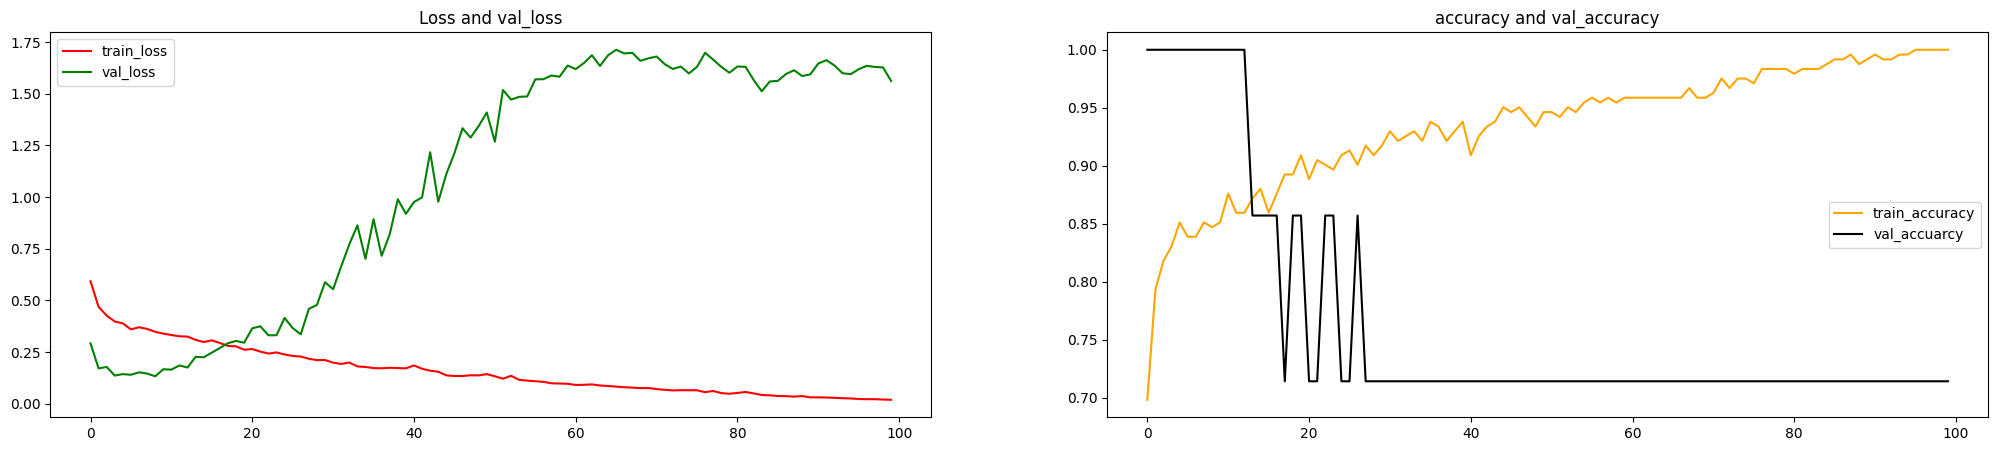

In [ ]:
plot_function_classification(history01)

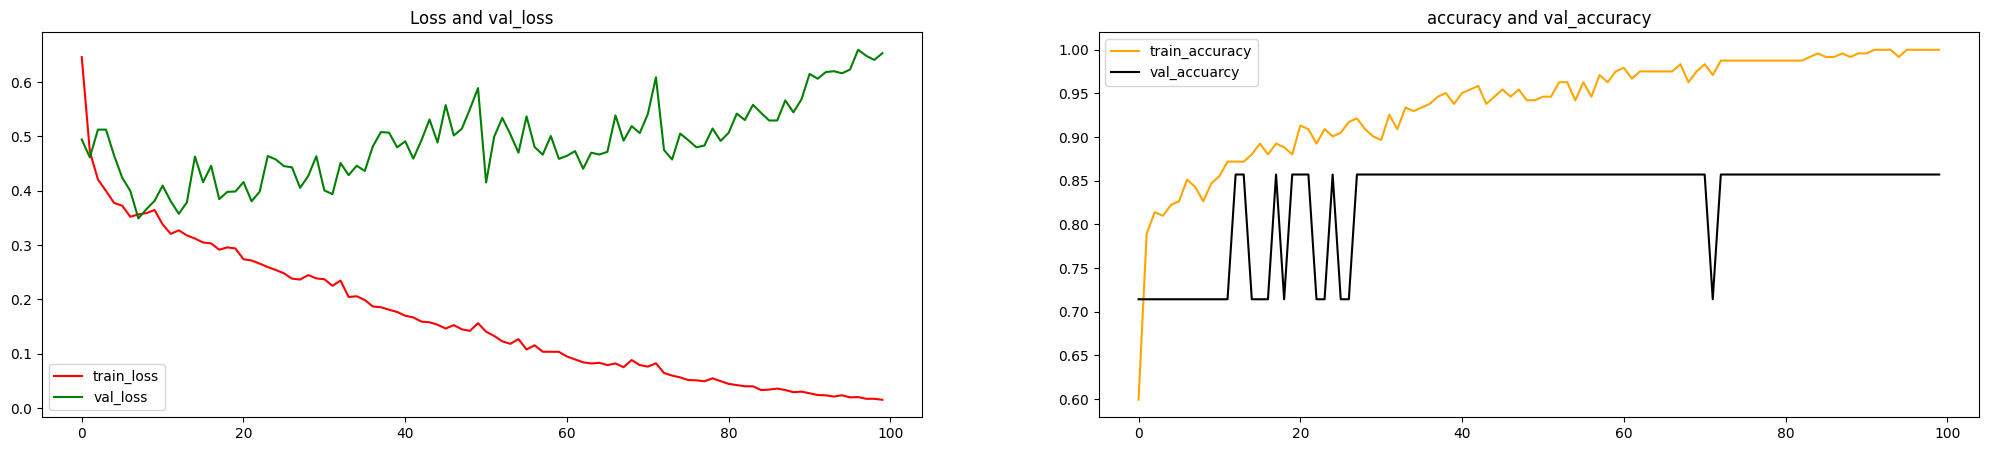

In [ ]:
plot_function_classification(history02)

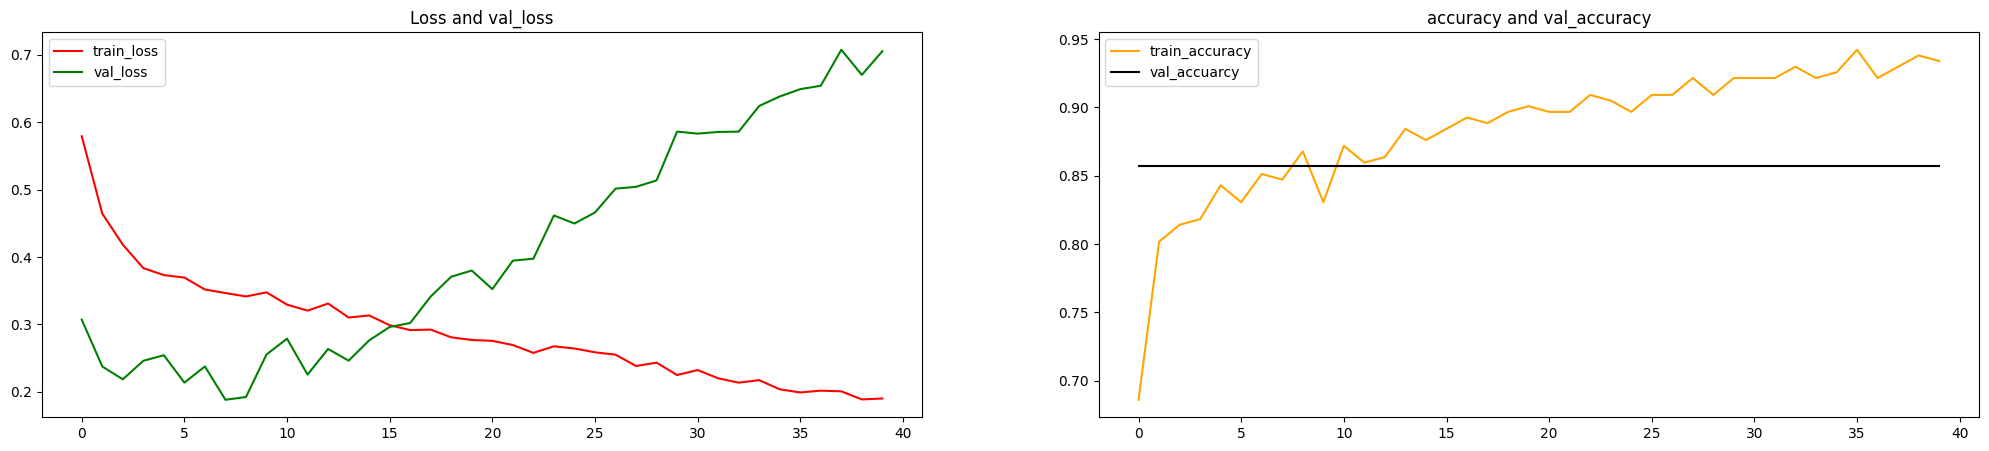

In [ ]:
plot_function_classification(history03)

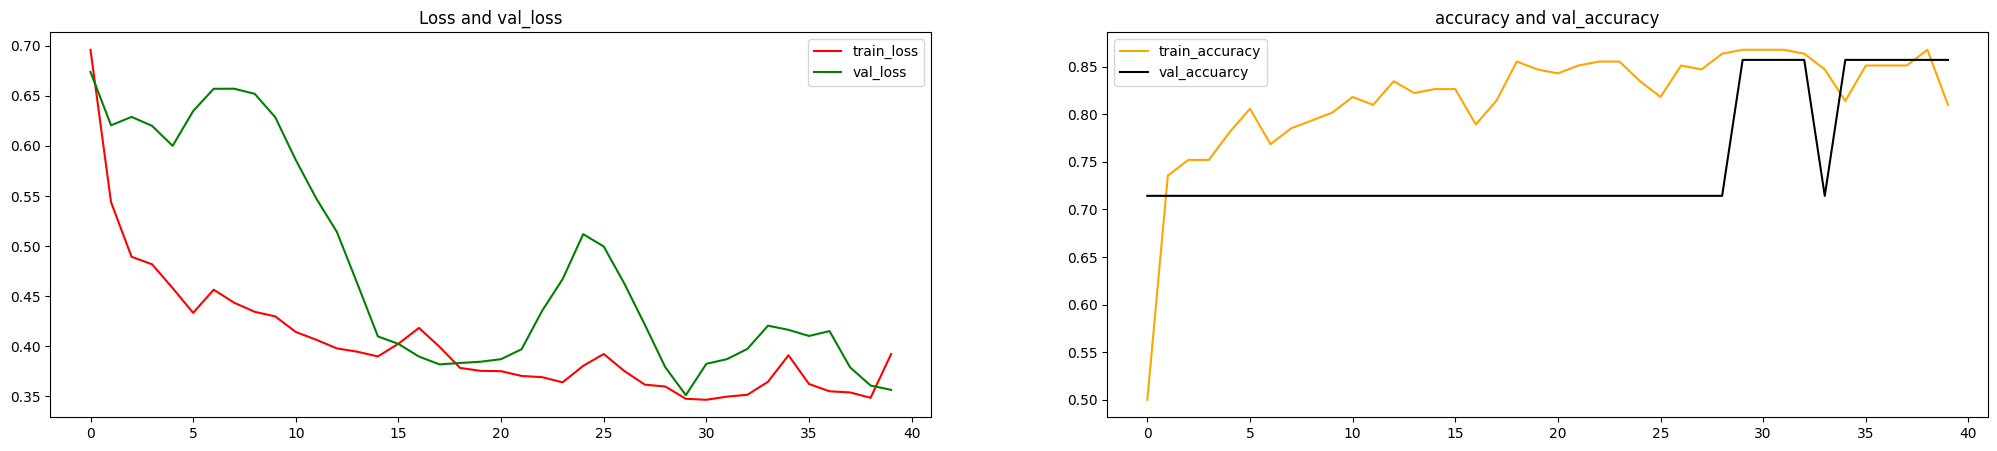

In [ ]:
plot_function_classification(history04)

## 2. House Price Prediction

### 1. Load dataset

In [ ]:
hp_df2.head()

,SalePrice,OverallQual,ExterQual,MiscVal,GrLivArea
0,208500.0,7.0,2.0,0.0,1710.0
1,181500.0,6.0,3.0,0.0,1262.0
2,223500.0,7.0,2.0,0.0,1786.0
3,140000.0,7.0,3.0,0.0,1717.0
4,250000.0,8.0,2.0,0.0,2198.0


### 2. Preprocess Data

In our dataset all variable are numerical variables.

In [ ]:
sc = StandardScaler()
hp_df2["SalePrice"] = sc.fit_transform(hp_df2["SalePrice"].values.reshape(-1,1))
hp_df2["OverallQual"] = sc.fit_transform(hp_df2["OverallQual"].values.reshape(-1,1))
hp_df2["ExterQual"] = sc.fit_transform(hp_df2["ExterQual"].values.reshape(-1,1))
hp_df2["MiscVal"] = sc.fit_transform(hp_df2["MiscVal"].values.reshape(-1,1))
hp_df2["GrLivArea"] = sc.fit_transform(hp_df2["GrLivArea"].values.reshape(-1,1))

### 3. Split Data

In [ ]:
hp_df2.head()

,SalePrice,OverallQual,ExterQual,MiscVal,GrLivArea
0,0.347273,0.651479,-0.777976,-0.087688,0.370333
1,0.007288,-0.071836,0.663451,-0.087688,-0.482512
2,0.536154,0.651479,-0.777976,-0.087688,0.515013
3,-0.515281,0.651479,0.663451,-0.087688,0.383659
4,0.869843,1.374795,-0.777976,-0.087688,1.299326


In [ ]:
x = hp_df2.iloc[:,1:]
y = hp_df2.iloc[:,0]

In [ ]:
x_train,x_part,y_train,y_part = train_test_split(x,y,test_size = .2,random_state = 42)
x_test,x_valid,y_test,y_valid = train_test_split(x_part,y_part,test_size = 0.1,random_state = 42)

In [ ]:
x_train.shape

(1168, 4)

### 4. Create ANN models.

In [ ]:
model11 = Sequential()
model11.add(Dense(32, input_shape=(4,), activation='relu'))
model11.add(Dense(55, activation='relu'))
model11.add(Dense(1, activation='linear'))

In [ ]:
model11.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 32)                160       
                                                                 
 dense_65 (Dense)            (None, 55)                1815      
                                                                 
 dense_66 (Dense)            (None, 1)                 56        
                                                                 
Total params: 2,031
Trainable params: 2,031
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling model
model11.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mse'])

In [ ]:
# fitting data into our model
history11 = model11.fit(x_train,y_train,epochs = 50,batch_size = 32,validation_data = (x_valid,y_valid))

Epoch 1/50
37/37 [==============================] - 1s 7ms/step - loss: 0.1683 - mse: 0.1683 - val_loss: 0.2371 - val_mse: 0.2371
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1661 - mse: 0.1661 - val_loss: 0.2306 - val_mse: 0.2306
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1640 - mse: 0.1640 - val_loss: 0.2351 - val_mse: 0.2351
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1649 - mse: 0.1649 - val_loss: 0.2406 - val_mse: 0.2406
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1627 - mse: 0.1627 - val_loss: 0.2236 - val_mse: 0.2236
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1623 - mse: 0.1623 - val_loss: 0.2431 - val_mse: 0.2431
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1630 - mse: 0.1630 - val_loss: 0.2303 - val_mse: 0.2303
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1631 - mse: 0.16

In [ ]:
def plot_function_regression(history):
    fig,ax = plt.subplots(1,2,figsize = (25,5))
    ax[0].plot(history.history['loss'],color = 'red',label = 'train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'],color = 'green',label = 'val_loss')
    ax[0].legend()
    ax[1].plot(history.history['mse'],color = 'orange',label = 'train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_mse'],color = 'black',label = 'val_accuarcy')
    ax[1].legend()

In [ ]:
model12 = Sequential()
model12.add(Dense(32, input_shape=(4,), activation='relu'))
model12.add(Dense(50, activation='relu'))
model12.add(Dense(1, activation='linear'))

In [ ]:
model12.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 32)                160       
                                                                 
 dense_71 (Dense)            (None, 50)                1650      
                                                                 
 dense_72 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model12.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mse'])

In [ ]:
history12 = model12.fit(x_train,y_train,epochs = 50,batch_size = 32,validation_data = (x_valid,y_valid))

Epoch 1/50
37/37 [==============================] - 1s 7ms/step - loss: 0.5390 - mse: 0.5390 - val_loss: 0.2671 - val_mse: 0.2671
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 0.2482 - mse: 0.2482 - val_loss: 0.2282 - val_mse: 0.2282
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 0.2448 - mse: 0.2448 - val_loss: 0.2326 - val_mse: 0.2326
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 0.2383 - mse: 0.2383 - val_loss: 0.2354 - val_mse: 0.2354
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 0.2403 - mse: 0.2403 - val_loss: 0.2371 - val_mse: 0.2371
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 0.2325 - mse: 0.2325 - val_loss: 0.2327 - val_mse: 0.2327
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 0.2256 - mse: 0.2256 - val_loss: 0.2325 - val_mse: 0.2325
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 0.2258 - mse: 0.22

In [ ]:
model13 = Sequential()
model13.add(Dense(32, input_shape=(4,), activation='relu'))
model13.add(Dense(50, activation='relu'))
model13.add(Dense(1, activation='linear'))

In [ ]:
model13.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 32)                160       
                                                                 
 dense_74 (Dense)            (None, 50)                1650      
                                                                 
 dense_75 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model13.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mse'])

In [ ]:
history13 = model13.fit(x_train,y_train,epochs = 40,batch_size = 32,validation_data = (x_valid,y_valid))

Epoch 1/40
37/37 [==============================] - 0s 5ms/step - loss: 0.1910 - mse: 0.1910 - val_loss: 0.2297 - val_mse: 0.2297
Epoch 2/40
37/37 [==============================] - 0s 4ms/step - loss: 0.1842 - mse: 0.1842 - val_loss: 0.2245 - val_mse: 0.2245
Epoch 3/40
37/37 [==============================] - 0s 3ms/step - loss: 0.1848 - mse: 0.1848 - val_loss: 0.2272 - val_mse: 0.2272
Epoch 4/40
37/37 [==============================] - 0s 3ms/step - loss: 0.1858 - mse: 0.1858 - val_loss: 0.2315 - val_mse: 0.2315
Epoch 5/40
37/37 [==============================] - 0s 3ms/step - loss: 0.1793 - mse: 0.1793 - val_loss: 0.2202 - val_mse: 0.2202
Epoch 6/40
37/37 [==============================] - 0s 3ms/step - loss: 0.1817 - mse: 0.1817 - val_loss: 0.2282 - val_mse: 0.2282
Epoch 7/40
37/37 [==============================] - 0s 3ms/step - loss: 0.1792 - mse: 0.1792 - val_loss: 0.2277 - val_mse: 0.2277
Epoch 8/40
37/37 [==============================] - 0s 3ms/step - loss: 0.1798 - mse: 0.17

In [ ]:
model14 = Sequential()
model14.add(Dense(32, input_shape=(4,), activation='relu'))
model14.add(Dense(50, activation='relu'))
model14.add(Dense(1, activation='linear'))

In [ ]:
model14.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 32)                160       
                                                                 
 dense_77 (Dense)            (None, 50)                1650      
                                                                 
 dense_78 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model14.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mse'])

In [ ]:
history14 = model14.fit(x_train,y_train,epochs = 40,batch_size = 50,validation_data = (x_valid,y_valid))

Epoch 1/40
24/24 [==============================] - 1s 9ms/step - loss: 0.7168 - mse: 0.7168 - val_loss: 0.3907 - val_mse: 0.3907
Epoch 2/40
24/24 [==============================] - 0s 4ms/step - loss: 0.3175 - mse: 0.3175 - val_loss: 0.2891 - val_mse: 0.2891
Epoch 3/40
24/24 [==============================] - 0s 4ms/step - loss: 0.2544 - mse: 0.2544 - val_loss: 0.2651 - val_mse: 0.2651
Epoch 4/40
24/24 [==============================] - 0s 4ms/step - loss: 0.2400 - mse: 0.2400 - val_loss: 0.2438 - val_mse: 0.2438
Epoch 5/40
24/24 [==============================] - 0s 4ms/step - loss: 0.2295 - mse: 0.2295 - val_loss: 0.2346 - val_mse: 0.2346
Epoch 6/40
24/24 [==============================] - 0s 4ms/step - loss: 0.2265 - mse: 0.2265 - val_loss: 0.2327 - val_mse: 0.2327
Epoch 7/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2245 - mse: 0.2245 - val_loss: 0.2332 - val_mse: 0.2332
Epoch 8/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2230 - mse: 0.22

### 5. Compare all the above created models

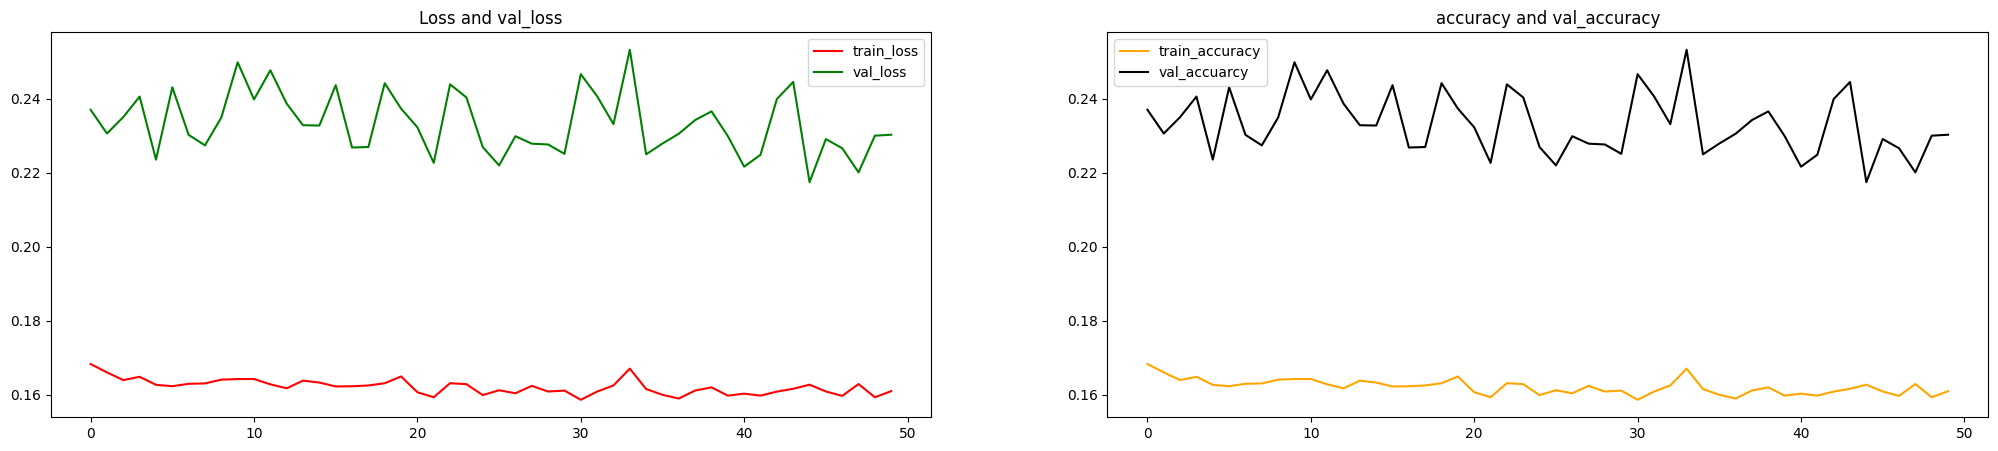

In [ ]:
plot_function_regression(history11)

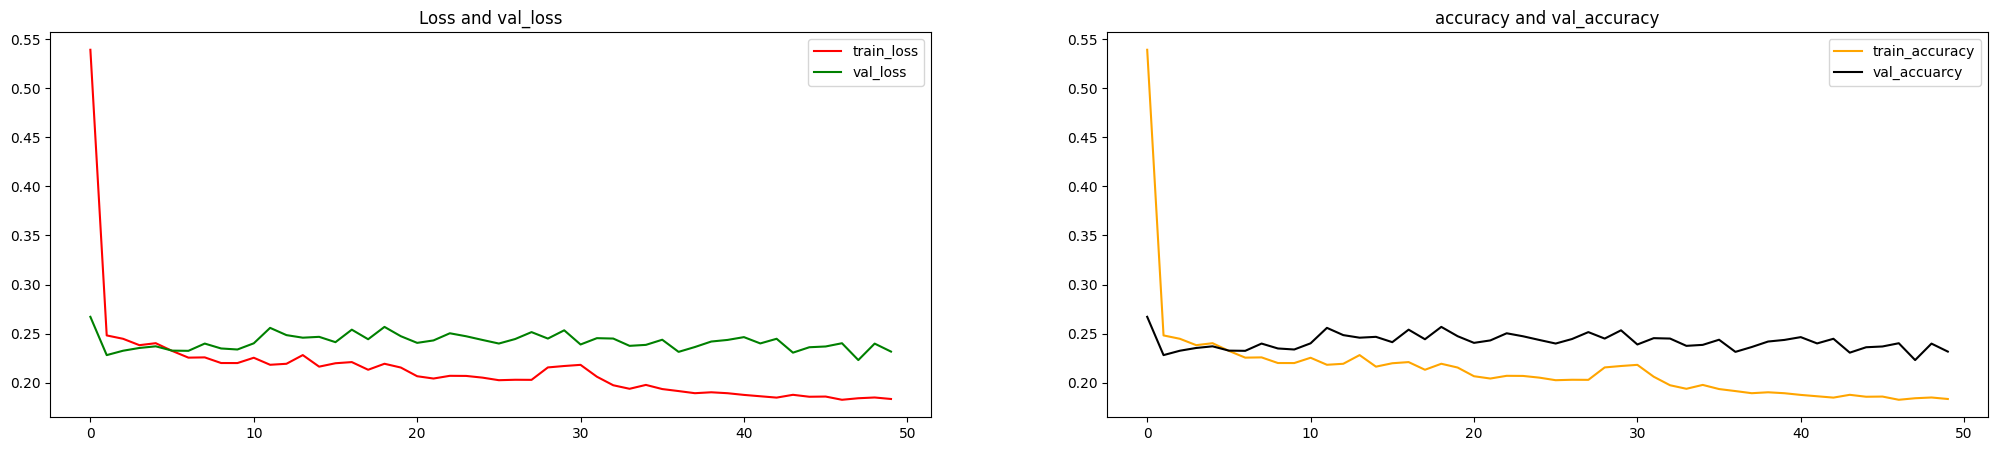

In [ ]:
plot_function_regression(history12)

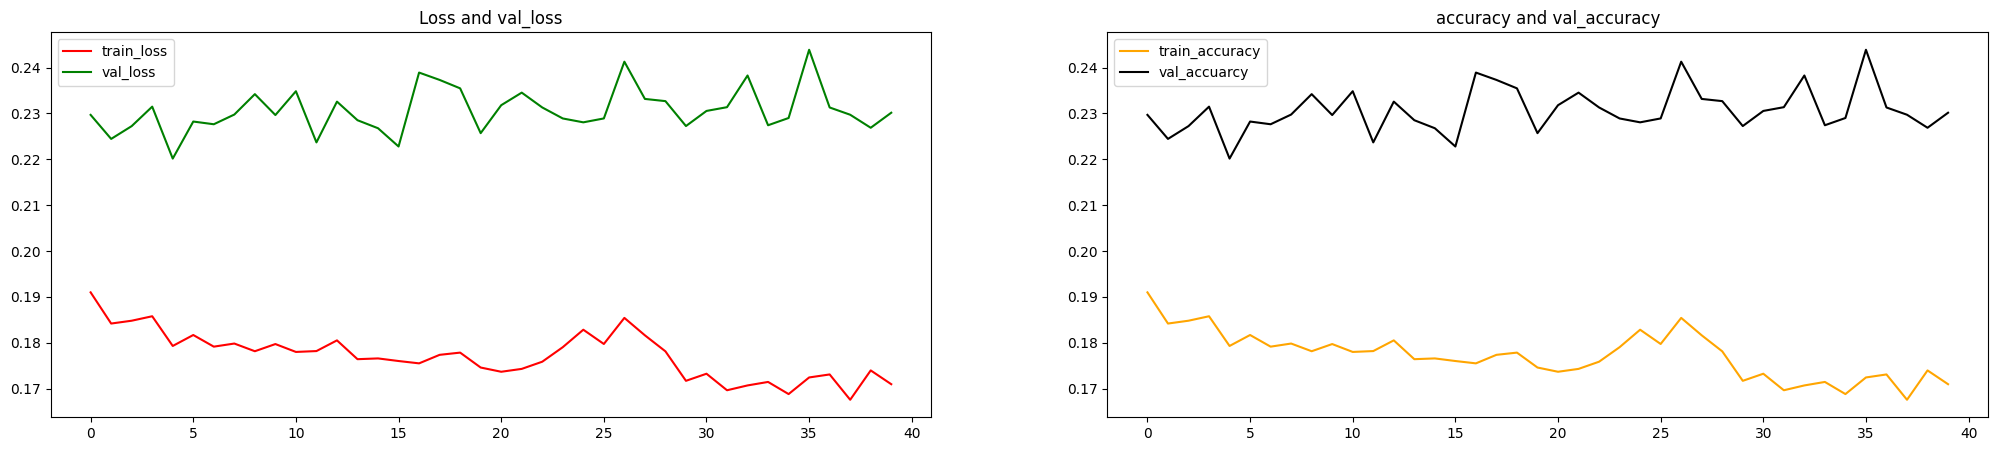

In [ ]:
plot_function_regression(history13)

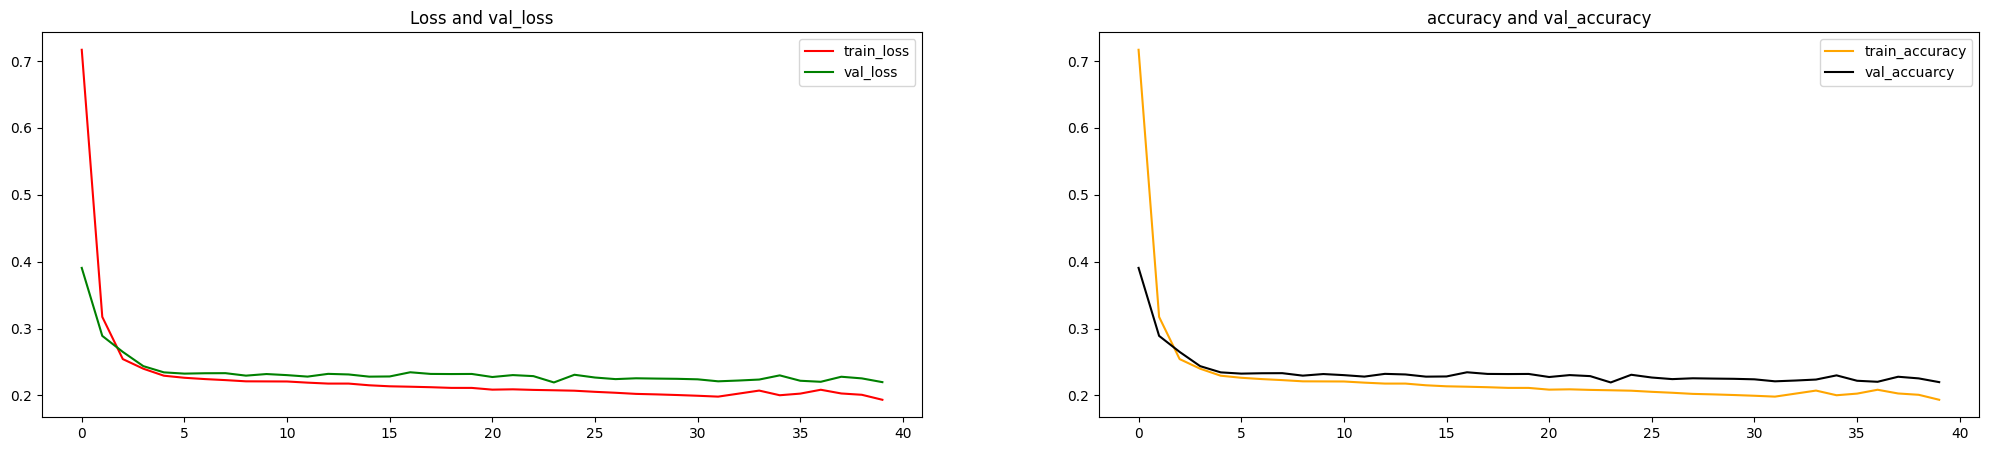

In [ ]:
plot_function_regression(history14)